In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [27]:
data = pd.read_excel("Data/train.xlsx")

In [28]:
data = data.dropna()

In [29]:
target = data["goal"]
train = data.drop("goal", axis = 1)
train = train.drop("lith", axis = 1)
train = train.drop("well id", axis = 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)

In [38]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import 
clf = GradientBoostingClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)

In [45]:
data_outputs = clf.predict(X_test)

Feature ranking:
1. feature 1 bk (0.271354)
2. feature 5 ALPS (0.266646)
3. feature 0 depth, m (0.174391)
4. feature 2 GZ1 (0.123710)
5. feature 3 DGK (0.122215)
6. feature 4 NKTR (0.041684)


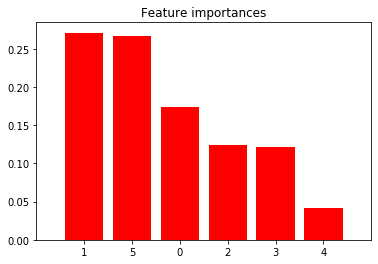

In [46]:
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%s. feature %d %s (%f)" % (f + 1, indices[f], train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [47]:
f1_score(y_test, data_outputs)

0.7900783289817231

In [25]:
usable = train.columns[indices[-7:]]

In [43]:
usable

Index(['NKTD', 'GZ5', 'GZ7', 'GZ3', 'GZ2', 'NKTM', 'GZ4'], dtype='object')

In [36]:
for par in usable:
    train = train.drop(par, axis = 1)

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.01)


In [1]:
def plot_well(well_id, meter):
    df = df_train[df_train["well id"] == well_id][[meter, 'depth, m']]
    plt.figure(figsize=(20, 6))
    sns.lineplot(x = df["depth, m"], y = df[meter])